In [2]:
import numpy as np
from astropy.io import fits as pf
import matplotlib.pyplot as plt

In [118]:
#Import SpIES / SHELA data
data = '/Users/johntimlin/Complete_Clustering_Analysis/Clustering/Data_sets/HZLZ_combined_all_hzclassifiers_wphotoz_zspecflg.fits'
obs = pf.open(data)[1].data
Z = obs.zbest
imag = -2.5/np.log(10) * (np.arcsinh((obs.iflux/1e9)/(2*1.8e-10))+np.log(1.8e-10)) 

dx = ((Z >= 2.9) & (obs.dec>=-1.2) & (obs.dec<=1.2)) & ((obs.Au <0.3) | (obs.zspec>2.9))
gdx = ((Z >= 2.9)&(imag >= 20.2) & (obs.dec>=-1.2) & (obs.dec<=1.2))

rand = '/Users/johntimlin/Complete_Clustering_Analysis/Clustering/Data_sets/Short_randoms_spsh.fits'
rnd = pf.open(rand)[1].data
rdx = ((rnd.DEC>=-1.2) & (rnd.DEC<=1.2)) #& ((rnd.RA>344) | (rnd.RA<60))

RAr = rnd.RA#[rdx]
RAd = obs.ra#[dx]


rRA = []
for i in range(len(RAr)):
    if RAr[i]>300:
        rRA.append(RAr[i]-360)
    else:
        rRA.append(RAr[i])

        
dRA = []
for j in range(len(RAd)):
    if RAd[j]>300:
        dRA.append(RAd[j]-360)
    else:
        dRA.append(RAd[j])
        

print len(dRA)    


1984


In [119]:
#Generate the redshift histogram for the faint objects

rbins = np.arange(-30,37,5)
dbins = np.arange(-1.2,1.2,0.25)

tdnum, rabins, decbins = np.histogram2d(dRA,obs.dec[dx],bins = [rbins,dbins])
rdnum, rabins, decbins = np.histogram2d(rRA,rnd.DEC[rdx],bins = [rbins,dbins])

ra_bin_midpoints = rabins[:-1] + np.diff(rabins)/2
dec_bin_midpoints = decbins[:-1] + np.diff(decbins)/2

rdnum = rdnum*(float(len(dRA))/len(rRA)) / (0.25*5)
tdnum = tdnum / (0.25*5)


denratio = tdnum/rdnum

print denratio

plt.figure(1)
plt.hist(denratio.flatten(),bins = 20)
plt.show()

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

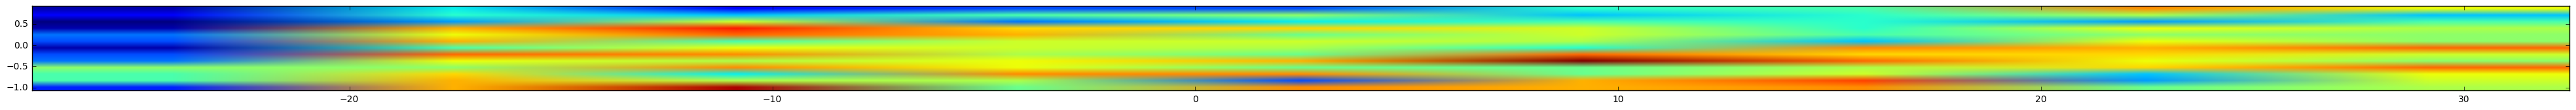

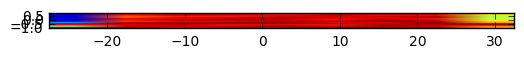

In [120]:
extent = [ra_bin_midpoints[0], ra_bin_midpoints[-1], dec_bin_midpoints[0], dec_bin_midpoints[-1]]

plt.figure(1,figsize = (50,5))
#plt.hist2d(dRA, obs.dec[dx], bins=(rabins, decbins))
plt.imshow(tdnum,extent = extent)
#plt.contourf(ra_bin_midpoints,dec_bin_midpoints,tdnum.T)
#plt.colorbar()#ticks=np.arange(0,10,0.25))
#plt.savefig('density.png')

plt.figure(2)
#plt.hist2d(rRA, rnd.DEC[rdx], bins=(rabins, decbins))
plt.imshow(rdnum,extent = extent)
#plt.contourf(ra_bin_midpoints,dec_bin_midpoints,rdnum.T)
#plt.colorbar()#ticks=np.arange(0,10,0.25))
#plt.savefig('density.png')

plt.show()

In [121]:
# Examine the densities of the MW plane and the non-MW plane

In [130]:
#data
nmw = ((obs.ra > 344) | (obs.ra<60)) & ((obs.zbest >= 2.9) & (obs.dec>=-1.2) & (obs.dec<=1.2))
mw = ((obs.ra < 344) & (obs.ra>60)) & ((obs.zspec >= 2.9))
mwnx= ((obs.ra < 344) & (obs.ra>60))
allx = ((obs.zbest >= 2.9) & (obs.dec>=-1.2) & (obs.dec<=1.2))
# randoms
rnmw = ((rnd.RA > 344) | (rnd.RA<60)) & ((rnd.DEC>=-1.2) & (rnd.DEC<=1.2))
rmw = ((rnd.RA < 344) & (rnd.RA>60))
rallx = ((rnd.DEC>=-1.2) & (rnd.DEC<=1.2))

In [123]:
print len(rnd.RA[rmw])/24.0
print len(rnd.RA[rnmw])/(120-24.0)

1339.125
1499.29166667


In [135]:
print len(obs.ra[mw])
print len(obs.ra[mwnx])
print (1.0*len(obs.ra[mwnx]))/len(obs.ra[mw])

177
450
2.54237288136


In [144]:
factor = (1.0*len(obs.ra[mwnx]))/len(obs.ra[mw])
print len(rnd.RA[rmw])
number = int(round(len(rnd.RA[rmw])/factor))

32139


In [145]:
ind = np.random.randint(0,len(rnd.RA[rmw]),number)


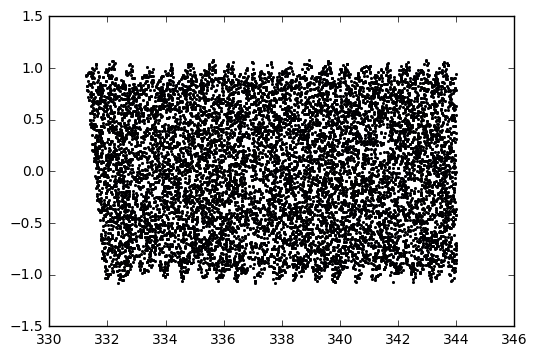

In [149]:
plt.scatter(rnd.RA[rmw][ind],rnd.DEC[rmw][ind],s=1)
plt.show()

In [ ]:
## Do with the KDE instead


In [4]:
import numpy as np
from astropy.io import fits as pf
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity as kde


In [121]:
#Import SpIES / SHELA data
data = '/Users/johntimlin/Complete_Clustering_Analysis/Clustering/Data_sets/HZLZ_combined_all_hzclassifiers_wphotoz_zspecflg.fits'
obs = pf.open(data)[1].data
Z = obs.zbest
imag = -2.5/np.log(10) * (np.arcsinh((obs.iflux/1e9)/(2*1.8e-10))+np.log(1.8e-10)) 

dx = ((Z >= 2.9) & (obs.dec>=-1.2) & (obs.dec<=1.2))
gdx = ((Z >= 2.9)&(imag >= 20.2) & (obs.dec>=-1.2) & (obs.dec<=1.2))

rand = '/Users/johntimlin/Complete_Clustering_Analysis/Clustering/Data_sets/Short_randoms_spsh.fits'
rnd = pf.open(rand)[1].data
rdx = ((rnd.DEC>=-1.2) & (rnd.DEC<=1.2))

RAr = rnd.RA[rdx]
RAd = obs.ra[dx]


rRA = []
for i in range(len(RAr)):
    if RAr[i]>300:
        rRA.append(RAr[i]-360)
    else:
        rRA.append(RAr[i])

        
dRA = []
for j in range(len(RAd)):
    if RAd[j]>300:
        dRA.append(RAd[j]-360)
    else:
        dRA.append(RAd[j])
        

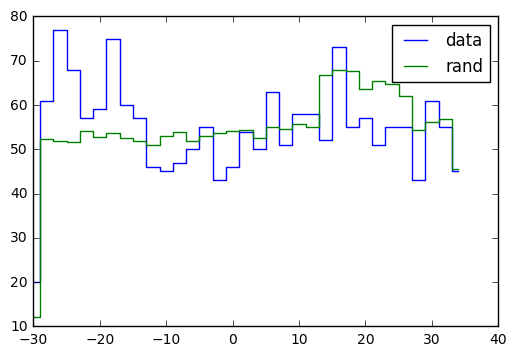

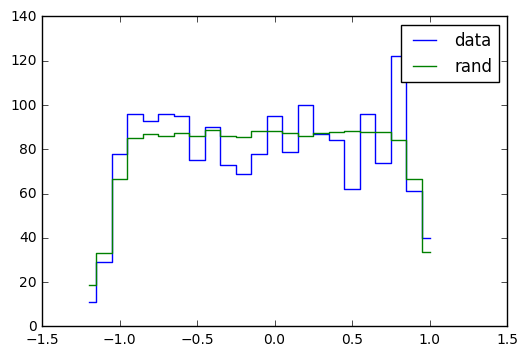

In [122]:
#Generate the redshift histogram for the faint objects

rbins = np.arange(-30,37,2)
dbins = np.arange(-1.2,1.2,0.1)


dranum, bins = np.histogram(dRA,rbins)
ddecnum, bins = np.histogram(obs.dec[dx],dbins)

rranum, bins = np.histogram(rRA,rbins)
rdecnum, bins = np.histogram(rnd.DEC[rdx],dbins)

rranum = rranum * float(len(obs.ra[dx]))/len(rnd.RA[rdx])
rdecnum = rdecnum * float(len(obs.ra[dx]))/len(rnd.RA[rdx])

plt.figure(1)
plt.plot(rbins[:-1],dranum,linestyle = 'steps-mid', label = 'data')
plt.plot(rbins[:-1],rranum,linestyle = 'steps-mid', label = 'rand')
plt.legend()

plt.figure(2)
plt.plot(dbins[:-1],ddecnum,linestyle = 'steps-mid', label = 'data')
plt.plot(dbins[:-1],rdecnum,linestyle = 'steps-mid', label = 'rand')

plt.legend()
plt.show()

In [139]:
#Set up a KDE for dNdz
#tmpz = Z[gdx][:, np.newaxis] #change the array from row shape (1) to column shape (1,)
tmpz = np.hstack([np.asarray(dRA)[:, np.newaxis],obs.dec[dx][:, np.newaxis]])

est = kde(bandwidth=0.25,kernel='gaussian') #Set up the Kernel
histkde = est.fit(tmpz) #fit the kernel to the data and find the density of the grid

val = histkde.sample(n_samples = 100*len(dRA))

new_ra = val[:,0]
new_dec = val[:,1]

print new_ra[0], new_dec[0]

24.4794236946 0.22450500458


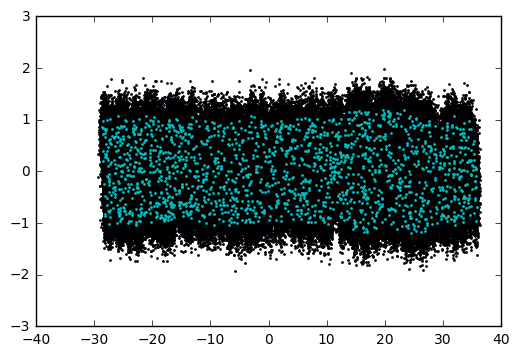

In [140]:
plt.scatter(new_ra,new_dec,s=1)
plt.scatter(dRA,obs.dec[dx],s=1,color = 'c')

plt.show()

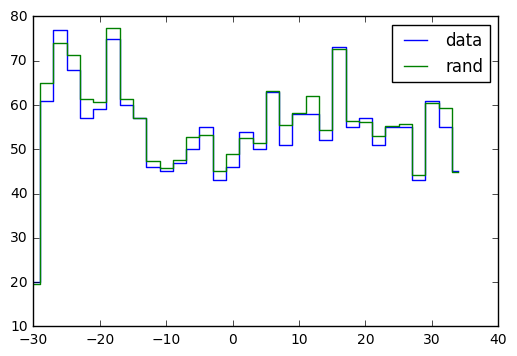

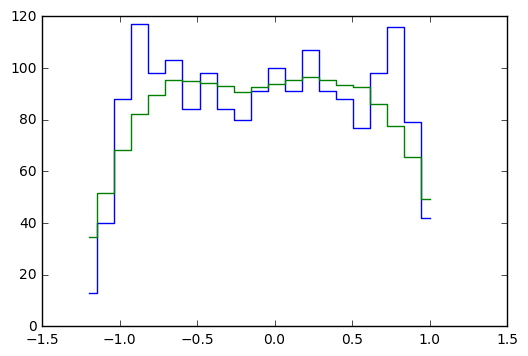

In [141]:
rbins = np.arange(-30,37,2)
dbins = np.arange(-1.2,1.2,0.11)


dranum, bins = np.histogram(dRA,rbins)
ddecnum, bins = np.histogram(obs.dec[dx],dbins)

rranum, bins = np.histogram(new_ra,rbins)
rdecnum, bins = np.histogram(new_dec,dbins)

rranum = rranum * float(len(obs.ra[dx]))/len(rnd.RA[rdx])
rdecnum = rdecnum * float(len(obs.ra[dx]))/len(rnd.RA[rdx])

plt.figure(1)
plt.plot(rbins[:-1],dranum,linestyle = 'steps-mid', label = 'data')
plt.plot(rbins[:-1],rranum,linestyle = 'steps-mid', label = 'rand')
plt.legend()

plt.figure(2)
plt.plot(dbins[:-1],ddecnum,linestyle = 'steps-mid', label = 'data')
plt.plot(dbins[:-1],rdecnum,linestyle = 'steps-mid', label = 'rand')

#plt.legend()
plt.show()

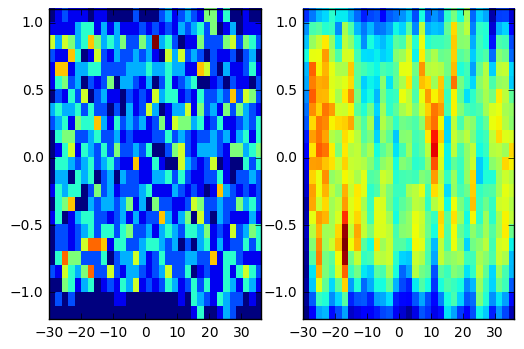

In [142]:
rabins = np.arange(-30,37,2)
decbins = np.arange(-1.2,1.2,0.1)



plt.subplot(121)#, aspect='equal')
plt.hist2d(dRA, obs.dec[dx], bins=(rabins, decbins))
plt.subplot(122)#, aspect='equal')
plt.hist2d(new_ra, new_dec, bins=(rabins, decbins))
plt.show()

In [143]:
tbhdu=pf.BinTableHDU.from_columns([pf.Column(name='ra',format='D',array=np.asarray(new_ra)), pf.Column(name='dec',format='D',array=np.asarray(new_dec))])
		

prihdr=pf.Header()
prihdr['COMMENT']="position matched sample"
prihdu=pf.PrimaryHDU(header=prihdr)
	
hdulist=pf.HDUList([prihdu,tbhdu])
hdulist.writeto('Position_match_random2.fits')
